In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [111]:
data = pd.read_csv('Data/500_Person_Gender_Height_Weight_Index (2).csv')
data

,Gender,Height,Weight,Body_Mass
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
5,Male,189,104,3
6,Male,147,92,5
7,Male,154,111,5
8,Male,174,90,3
9,Female,169,103,4


In [112]:
#data= data.drop(['Body_Mass'],axis=1)
#data

In [113]:
data.head()

,Gender,Height,Weight,Body_Mass
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [114]:
data.tail(7)

,Gender,Height,Weight,Body_Mass
493,Female,170,53,1
494,Male,152,98,5
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5
499,Male,173,131,5


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
Gender       500 non-null object
Height       500 non-null int64
Weight       500 non-null int64
Body_Mass    500 non-null int64
dtypes: int64(3), object(1)
memory usage: 13.7+ KB


In [116]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Body_Mass'], dtype='object')

In [117]:
data.describe()

,Height,Weight,Body_Mass
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [118]:
data.shape

(500, 4)

In [119]:
type(data)

pandas.core.frame.DataFrame

In [120]:
#wdata['Play']=wdata['Play'].replace('yes',0)
#wdata['Play']=wdata['Play'].replace('no',1)
data['Gender']=data['Gender'].replace('Male',0)
data['Gender']=data['Gender'].replace('Female',1)

In [149]:
data['Gender']

0      0
1      0
2      1
3      1
4      0
      ..
495    1
496    1
497    1
498    0
499    0
Name: Gender, Length: 500, dtype: int64

In [150]:
data.columns

Index(['Gender', 'Height', 'Weight', 'Body_Mass'], dtype='object')

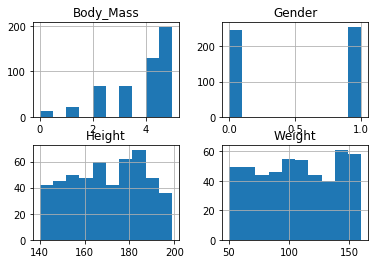

In [151]:
viz = data[['Gender', 'Height', 'Weight', 'Body_Mass']]
viz.hist();

In [153]:
x = data[['Height', 'Weight', 'Body_Mass']]
x.head()

,Height,Weight,Body_Mass
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


In [154]:
y=data[['Gender']]
x.tail()

,Height,Weight,Body_Mass
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5
499,173,131,5


In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train,x_test,y_train,y_test = train_test_split(data[['Height','Weight','Body_Mass']],data.Gender,train_size=0.9)

In [124]:
#x_train,x_test,y_train,y_test.head(3)

In [125]:
x_train.shape

(450, 3)

In [126]:
x_test.shape

(50, 3)

In [127]:
y_train.shape

(450,)

In [155]:
y_test.shape

(50,)

In [ ]:
"""from sklearn import linear_model
regr = linear_model.LinearRegression()"""

In [129]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [156]:
model.fit(x_train,y_train)

c:\users\sivag\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [159]:
model.coef_

array([[ 0.00059144,  0.00338033, -0.15766368]])

In [161]:
model.intercept_

array([0.22543959])

In [162]:
model.score

<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [131]:
y_prediction = model.predict(x_test)
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0], dtype=int64)

In [163]:
model.predict_proba(x_test)

array([[0.47431625, 0.52568375],
       [0.49981442, 0.50018558],
       [0.4483305 , 0.5516695 ],
       [0.4947152 , 0.5052848 ],
       [0.49689086, 0.50310914],
       [0.47340994, 0.52659006],
       [0.46568524, 0.53431476],
       [0.48445279, 0.51554721],
       [0.49439908, 0.50560092],
       [0.3730468 , 0.6269532 ],
       [0.47410524, 0.52589476],
       [0.421655  , 0.578345  ],
       [0.4139941 , 0.5860059 ],
       [0.37593704, 0.62406296],
       [0.48983704, 0.51016296],
       [0.46658987, 0.53341013],
       [0.44589264, 0.55410736],
       [0.42567859, 0.57432141],
       [0.49529342, 0.50470658],
       [0.44219373, 0.55780627],
       [0.41875205, 0.58124795],
       [0.46533477, 0.53466523],
       [0.43025064, 0.56974936],
       [0.45659993, 0.54340007],
       [0.51193176, 0.48806824],
       [0.44967483, 0.55032517],
       [0.49782127, 0.50217873],
       [0.37235542, 0.62764458],
       [0.45583059, 0.54416941],
       [0.37704774, 0.62295226],
       [0.

In [164]:
model.score(x_test,y_test)

0.44

In [133]:
model.predict([[185,110,4]])

array([1], dtype=int64)

In [134]:
model.predict([[174,96,5]])

array([0], dtype=int64)

In [135]:
model.predict([[150,95,7]])

array([0], dtype=int64)

In [136]:
model.predict([[150,72,2]])

array([1], dtype=int64)

In [137]:
data.head(10)

,Gender,Height,Weight,Body_Mass
0,0,174,96,4
1,0,189,87,2
2,1,185,110,4
3,1,195,104,3
4,0,149,61,3
5,0,189,104,3
6,0,147,92,5
7,0,154,111,5
8,0,174,90,3
9,1,169,103,4


In [139]:
model.predict([[169,103,5]])

array([0], dtype=int64)

In [141]:
model.predict([[174,90,3]])

array([1], dtype=int64)

In [142]:
model.predict([[189,104,4]])

array([1], dtype=int64)

In [143]:
model.predict([[195,104,3]])

array([1], dtype=int64)

In [144]:
model.predict([[173,96,4]])

array([1], dtype=int64)

In [145]:
model.score(x_train,y_train)

0.5244444444444445

In [146]:
model.score(x_test,y_test)

0.44

In [165]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [167]:
print('mean_absolute_error:',mean_absolute_error(y_test,y_prediction))

mean_absolute_error: 0.56


In [168]:
print('mean_squared_error',mean_squared_error(y_test,y_prediction))

mean_squared_error 0.56


In [169]:
print('r2_score:',r2_score(y_test,y_prediction))

r2_score: -1.3333333333333335


In [170]:
from sklearn.model_selection import cross_val_predict

In [172]:
cv_result = cross_val_predict(model,x_train,y_train,cv = 30)
cv_result

c:\users\sivag\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sivag\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sivag\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sivag\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\sivag\appdata\local\programs\python\pyt

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,

In [173]:
np.mean(cv_result)

0.7288888888888889

In [174]:
np.max(cv_result)

1

In [175]:
np.min(cv_result)

0

In [177]:
model.predict([[2,4,13]])

array([0], dtype=int64)

In [178]:
x_test.head(9)

,Height,Weight,Body_Mass
54,196,116,4
451,172,90,4
162,192,101,3
212,153,146,5
18,144,145,5
175,185,119,4
444,186,128,4
134,171,155,5
377,178,142,5


In [179]:
model.predict([[144,145,5]])

array([1], dtype=int64)